In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
# from tqdm import

In [2]:
connectivity_min, connectivity_max = 0.1,65
random_input_span = (9.5,13.5)

total_time = 100

neuron_model = 'Rotational'
model_folder_name = neuron_model+'_ensembles'

# Capture related ensembles

In [3]:
def list_folders_in_path(path):
    return [ name for name in os.listdir( path ) if os.path.isdir( os.path.join(path, name) ) ]

In [4]:
num_neurons = 10000
target_networks_name = 'N{}_T{}_I{}_{}'.format(num_neurons,total_time,random_input_span[0],random_input_span[1])
target_path = os.path.join(model_folder_name,target_networks_name)
all_g_folders = list_folders_in_path(target_path)
desired_g_folders = all_g_folders

# delay_folder_name = 'd_{}'.format(delay)

In [5]:
sigma_glossary_dict = {}
amin_saman_param_glossary_dict = {}
field_period_glossary_dict = {}

In [6]:
for g_folder in desired_g_folders:
    available_d_folders = list_folders_in_path(os.path.join(target_path,g_folder))

    g = float( g_folder.split('_')[1] ) #folder names are g_# d_#
    
    sigma_glossary_dict[g] = {}
    amin_saman_param_glossary_dict[g] = {}
    field_period_glossary_dict[g] = {}
    
    for d_folder in available_d_folders:
        delay = float( d_folder.split('_')[1] ) #folder names are d_#
        
        g_d_path = os.path.join(target_path, g_folder, d_folder)

        try:
            g_ensembles_list = list_folders_in_path(g_d_path)
            

            sigma_glossary_dict[g].update( {delay:[]} )
            amin_saman_param_glossary_dict[g].update( {delay:[]} )
            field_period_glossary_dict[g].update( {delay:[]} )
        except: #if the given connectivity and delay has not been measured even once
            continue

        for ensemble_num in g_ensembles_list:
            ensemble_path = os.path.join(g_d_path, ensemble_num)
            with open( os.path.join(ensemble_path,'sigma.txt') ) as file:
                sigma = float( file.readline() )
                sigma_glossary_dict[g][delay].append( sigma )

            with open( os.path.join(ensemble_path,'field_period.txt') ) as file:
                field_period = float( file.readline() )
                field_period_glossary_dict[g][delay].append( field_period )                

            if neuron_model == 'Rotational': #if not does not exist
                with open( os.path.join(ensemble_path,'amin_saman_param.txt') ) as file:
                    amin_saman_param = float( file.readline() )        
                    amin_saman_param_glossary_dict[g][delay].append( amin_saman_param )        


        sigma_glossary_dict[g][delay] = np.mean(sigma_glossary_dict[g][delay])
        amin_saman_param_glossary_dict[g][delay] = np.mean(amin_saman_param_glossary_dict[g][delay])
        field_period_glossary_dict[g][delay] = np.mean(field_period_glossary_dict[g][delay])


# Sigma dataframe

In [7]:
sigma_table = pd.DataFrame.from_dict(sigma_glossary_dict)
sigma_table.index.name = 'delay'
sigma_table.columns.name = 'connectivity'
sigma_table

connectivity,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
delay,,,,,,,,,,
0.05,0.168884,0.168396,0.167259,0.166241,0.169396,0.167286,0.167708,0.170142,0.169339,0.170532
0.07,0.195911,0.196120,0.197460,0.199518,0.200255,0.201777,0.209919,0.244403,0.279895,0.291623
0.09,0.208498,0.210548,0.214063,0.217199,0.226107,0.324217,0.347110,0.360305,0.364925,0.366454
0.11,0.212584,0.213387,0.217682,0.328762,0.386967,0.402306,0.409433,0.412795,0.413162,0.411347
0.13,0.219266,0.222939,0.338940,0.423980,0.441121,0.446921,0.449817,0.452207,0.448825,0.445539
0.15,0.240280,0.267418,0.446252,0.471999,0.483473,0.499609,0.507429,0.501835,0.492584,0.485073
0.17,0.231171,0.402468,0.478284,0.495475,0.500206,0.505060,0.506597,0.507811,0.509626,0.509289
0.19,0.230537,0.472113,0.514772,0.527969,0.530605,0.531834,0.532453,0.533659,0.536952,0.540341
0.21,0.246700,0.512575,0.540393,0.549207,0.550760,0.552112,0.556124,0.560546,0.568175,0.573862


Text(0.5, 1, 'Sigma as an Order parameter')

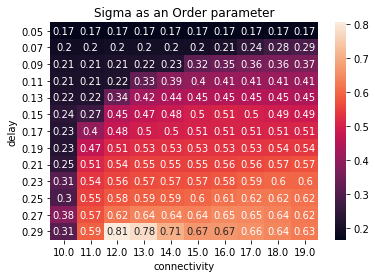

In [8]:
ax_sigma = sns.heatmap(sigma_table, annot=True)
ax_sigma.set_title('Sigma as an Order parameter')

# Field period dataframe

In [9]:
field_period_table = pd.DataFrame.from_dict(field_period_glossary_dict)
field_period_table.index.name = 'delay'
field_period_table.columns.name = 'connectivity'
field_period_table

connectivity,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
delay,,,,,,,,,,
0.05,0.413230,0.429216,0.350877,0.420212,0.390774,0.403226,0.409041,0.435782,0.407043,0.255102
0.07,0.455761,0.431984,0.430269,0.447447,0.461896,0.395257,0.363526,0.312990,0.314469,0.318471
0.09,0.430269,0.440537,0.452526,0.362319,0.362338,0.359095,0.373155,0.380228,0.389877,0.398413
0.11,0.424722,0.441503,0.393707,0.401606,0.414938,0.427350,0.440529,0.450450,0.459773,0.471698
0.13,0.454555,0.465157,0.442478,0.464040,0.479619,0.489024,0.502513,0.529115,0.529101,0.406140
0.15,0.478469,0.491403,0.502513,0.520833,0.534759,0.839576,0.405296,0.495248,0.606061,0.927843
0.17,0.526330,0.533337,0.560264,0.576374,0.595238,0.617284,0.636969,0.671141,0.680272,0.352735
0.19,0.623107,0.583095,0.631675,0.632911,0.653595,0.692050,0.714286,0.547445,0.754728,0.800000
0.21,0.613867,0.632911,0.657923,0.699438,0.719462,0.746310,0.781250,0.816340,0.854701,0.892857


Text(0.5, 1, 'Field period time')

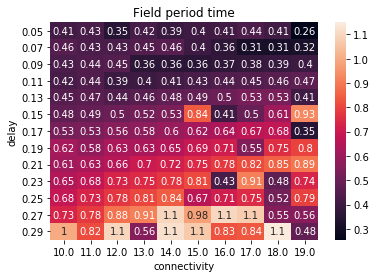

In [10]:
ax_field_period = sns.heatmap(field_period_table, annot=True)
ax_field_period.set_title('Field period time')

# Amin Saman Parameter

Text(0.5, 1, 'AminSaman as an Order parameter ')

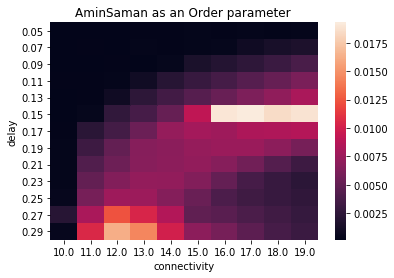

In [11]:
amin_saman_param_table = pd.DataFrame.from_dict(amin_saman_param_glossary_dict)
amin_saman_param_table.index.name = 'delay'
amin_saman_param_table.columns.name = 'connectivity'
ax_field_period = sns.heatmap(amin_saman_param_table)
ax_field_period.set_title('AminSaman as an Order parameter ')